In [189]:
import pandas as pd
!pip install networkx
import networkx as nx
import matplotlib.pyplot as plt

In [186]:
## pcap file exported as csv file from wireshark
packets = pd.read_csv('pcap.csv')

In [20]:
ip_communications = {}

In [163]:
## filtering destinations of given source
for source in packets['Source'].unique():
    ip_communications.update({
        source: packets.loc[packets['Source'] == source, 'Destination']
    })

In [164]:
## removing duplicates in destination
for source in ip_communications:
    ip_communications[source] = ip_communications[source].unique()
ip_communications['192.168.1.10']

array(['192.168.1.30', '192.168.1.20', '192.168.1.60', '192.168.1.40',
       '192.168.1.50', '192.168.1.200', '239.192.2.63', '192.168.1.100'],
      dtype=object)

In [187]:
G = nx.DiGraph()
## adding edges
for source in ip_communications:
    for destination in ip_communications[source]:
        G.add_edge(source, destination)

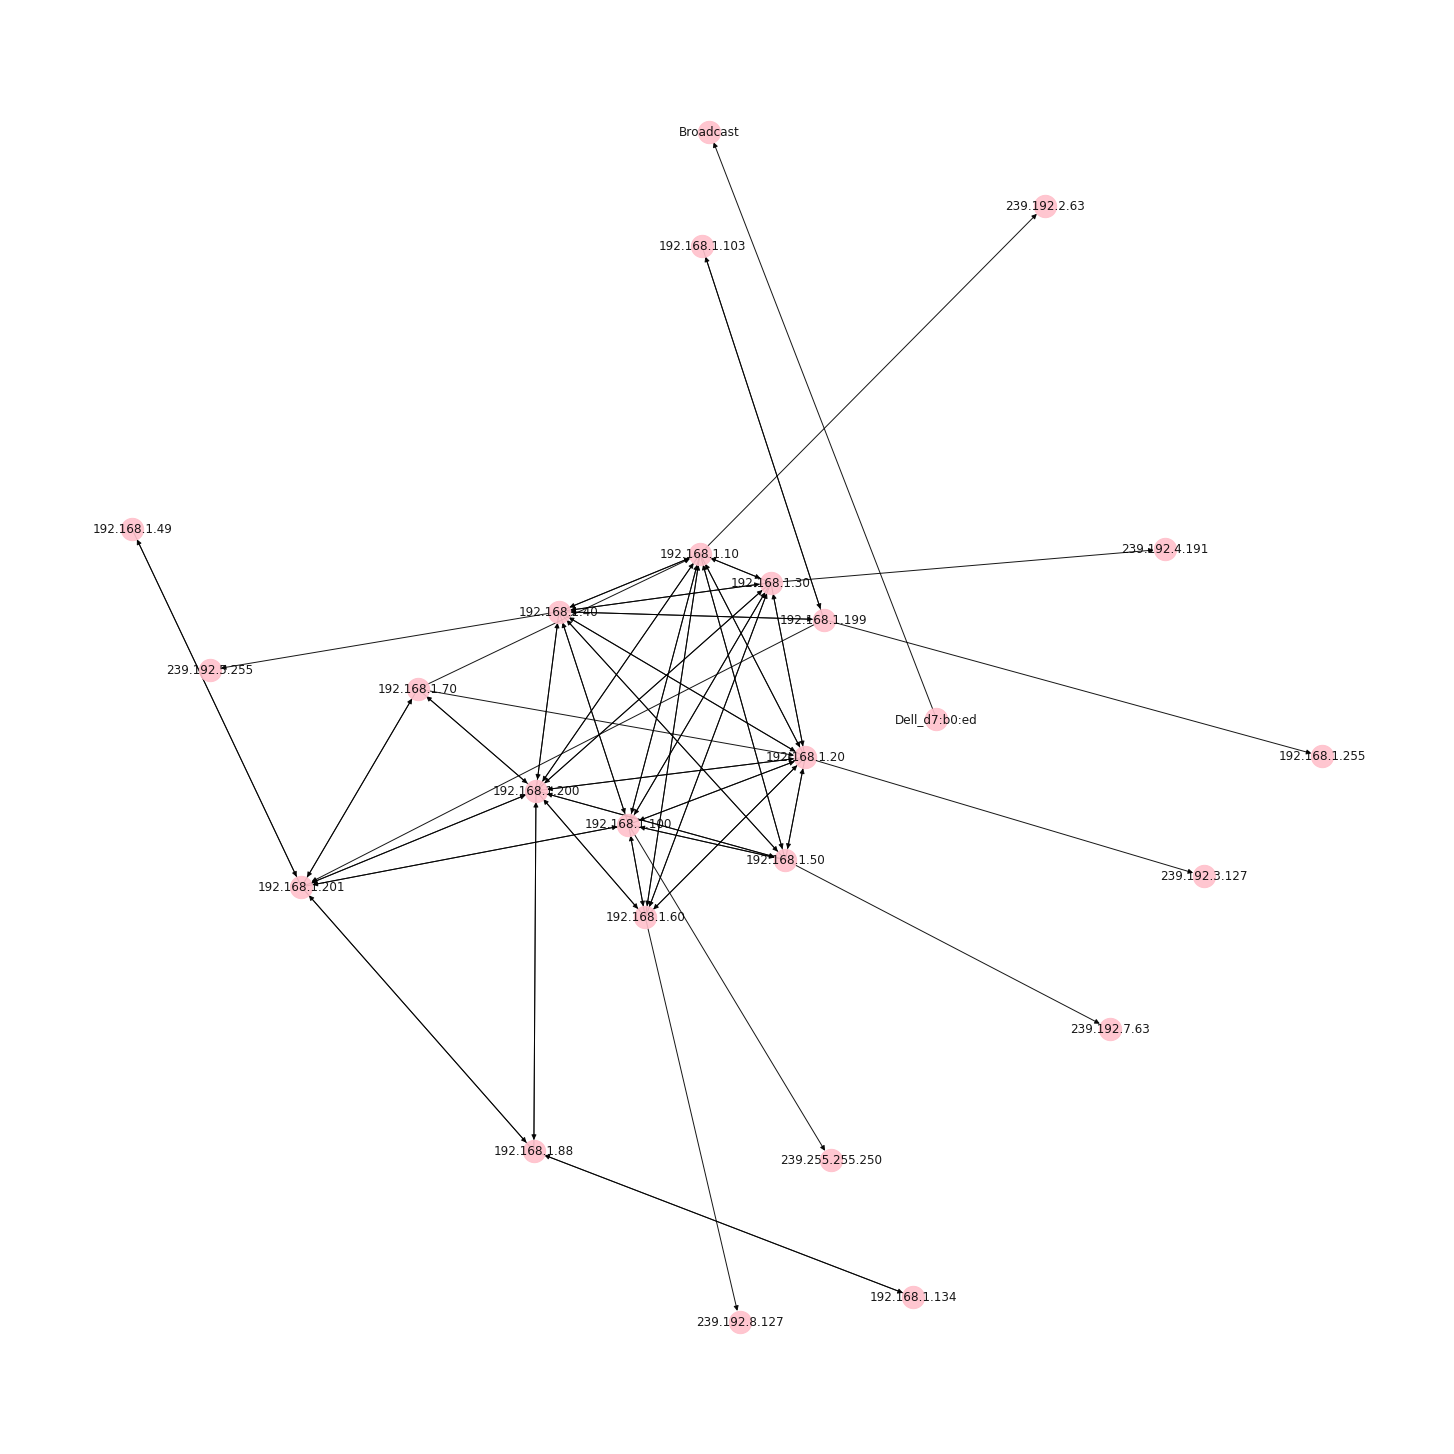

In [188]:
pos = nx.spring_layout(G, k=0.50, iterations=20)
plt.figure(figsize=(20,20))
nx.draw(G, pos, edge_color='black', width=1, linewidths=1, \
       node_size=500, node_color='pink', alpha=0.9, \
       labels={node:node for node in G.nodes()}, scale=10)
plt.axis('off')
plt.show()